In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime

start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2023-04-10  161.419998  162.029999  160.080002  162.029999  161.806183   
       2023-04-11  162.350006  162.360001  160.509995  160.800003  160.577896   
       2023-04-12  161.220001  162.059998  159.779999  160.100006  159.878860   
       2023-04-13  161.630005  165.800003  161.419998  165.559998  165.331314   
       2023-04-14  164.589996  166.320007  163.820007  165.210007  164.981812   

                     Volume  
Ticker Date                  
AAPL   2023-04-10  47716900  
       2023-04-11  47644200  
       2023-04-12  50133100  
       2023-04-13  68445600  
       2023-04-14  49386500  


In [3]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-04-10  161.419998  162.029999  160.080002  162.029999   
1   AAPL 2023-04-11  162.350006  162.360001  160.509995  160.800003   
2   AAPL 2023-04-12  161.220001  162.059998  159.779999  160.100006   
3   AAPL 2023-04-13  161.630005  165.800003  161.419998  165.559998   
4   AAPL 2023-04-14  164.589996  166.320007  163.820007  165.210007   

    Adj Close    Volume  
0  161.806183  47716900  
1  160.577896  47644200  
2  159.878860  50133100  
3  165.331314  68445600  
4  164.981812  49386500  


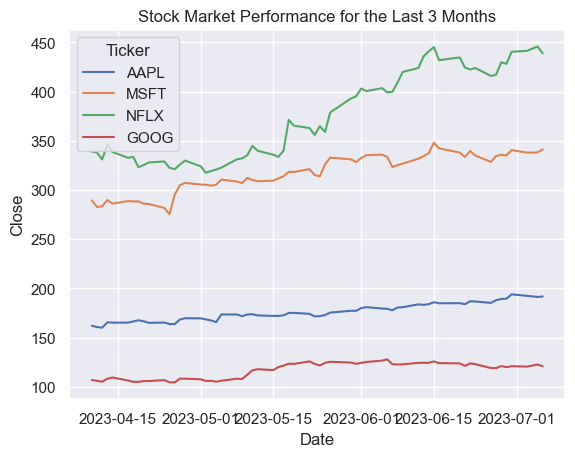

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the Seaborn plot
sns.set(style="darkgrid")

# Create the line plot using Seaborn
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker')
plt.title('Stock Market Performance for the Last 3 Months')
plt.show()

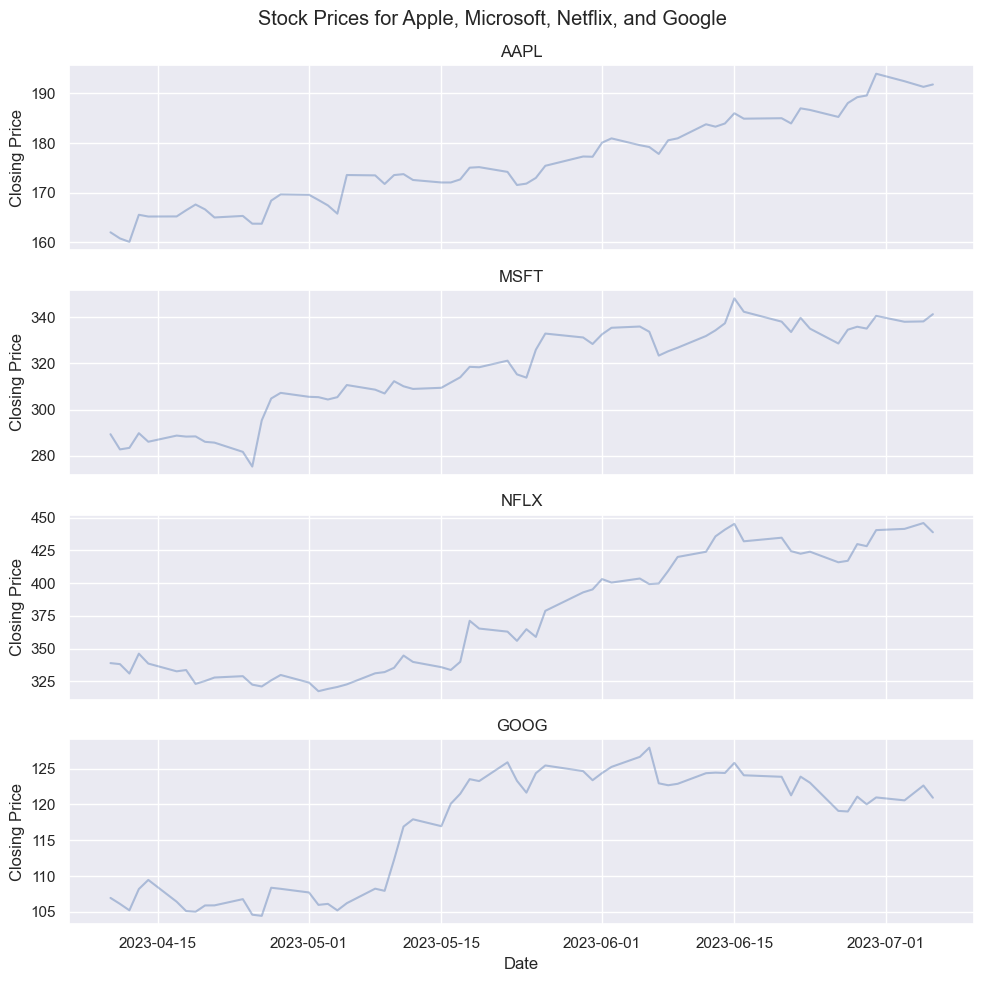

In [12]:
fig, axs = plt.subplots(len(df['Ticker'].unique()), 1, figsize=(10, 10), sharex=True)

# Iterate over unique tickers
for i, ticker in enumerate(df['Ticker'].unique()):
    # Filter the DataFrame by ticker
    df_ticker = df[df['Ticker'] == ticker]
    
    # Plot the area chart for the ticker
    sns.lineplot(data=df_ticker, x='Date', y='Close', ax=axs[i], alpha=0.4)
    
    # Set the y-axis label
    axs[i].set_ylabel('Closing Price')
    
    # Set the title for each subplot
    axs[i].set_title(ticker)

# Set the x-axis label and title for the entire figure
fig.suptitle('Stock Prices for Apple, Microsoft, Netflix, and Google')
axs[-1].set_xlabel('Date')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
56  186.574998  183.799000
57  187.370999  184.493000
58  188.125000  185.068501
59  188.757001  185.656001
60  189.542000  186.286000

[61 rows x 2 columns]
Moving Averages for GOOG
        MA10      MA20
183      NaN       NaN
184      NaN       NaN
185      NaN       NaN
186      NaN       NaN
187      NaN       NaN
..       ...       ...
239  122.104  123.3410
240  121.622  123.1710
241  121.272  122.9375
242  121.150  122.7375
243  121.117  122.3885

[61 rows x 2 columns]
Moving Averages for MSFT
           MA10        MA20
61          NaN         NaN
62          NaN         NaN
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
..          ...         ...
117  337.083997  334.367499
118  336.327997  334.765500
119  335.893997  334.895000

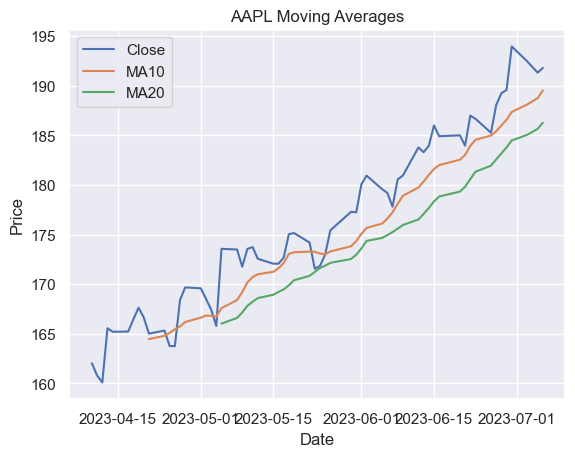

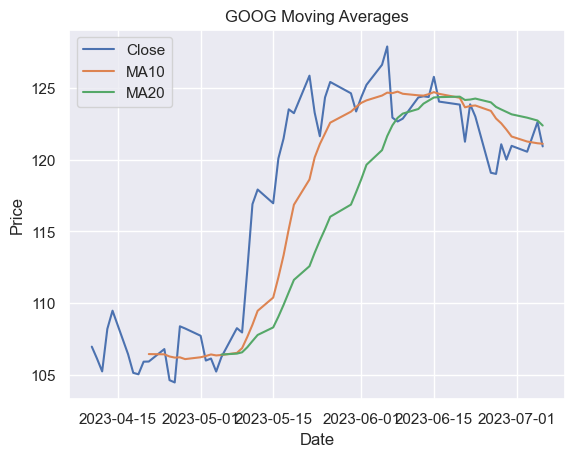

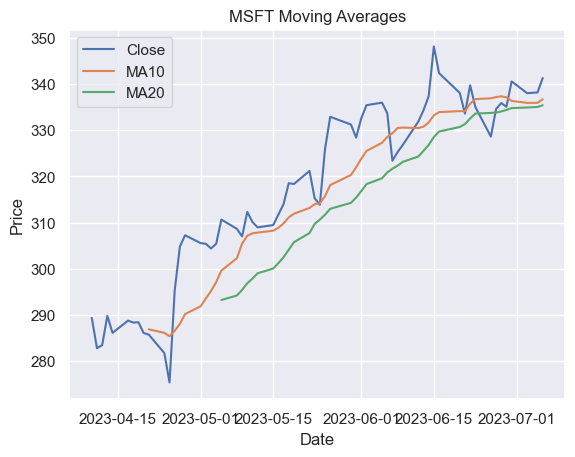

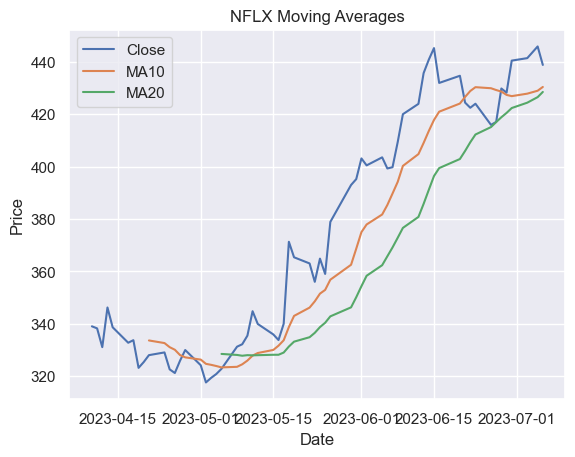

In [13]:
grouped_df = df.groupby('Ticker')

# Iterate over the groups
for ticker, group in grouped_df:
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the Close prices
    sns.lineplot(data=group, x='Date', y='Close', label='Close')
    
    # Plot the moving averages (MA10 and MA20)
    sns.lineplot(data=group, x='Date', y='MA10', label='MA10')
    sns.lineplot(data=group, x='Date', y='MA20', label='MA20')
    
    # Set the title and labels
    ax.set_title(f"{ticker} Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    # Add a legend
    ax.legend()
    
    # Display the plot
    plt.show()


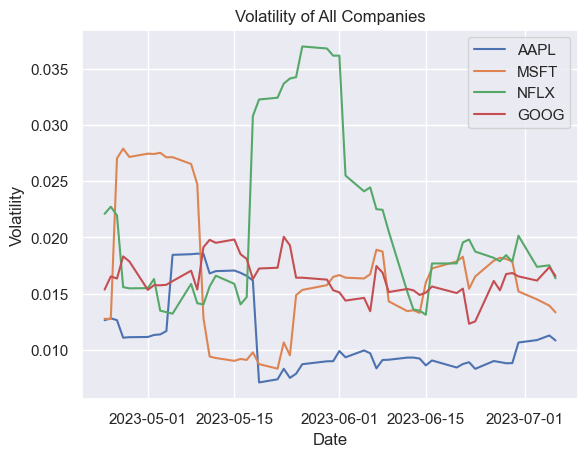

In [14]:
sns.lineplot(data=df, x='Date', y='Volatility', hue='Ticker')

# Set the title and labels
plt.title('Volatility of All Companies')
plt.xlabel('Date')
plt.ylabel('Volatility')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# create a DataFrame with the stock prices of Apple and Microsoft


In [9]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='Date')


# A scatter plot to visualize the correlation

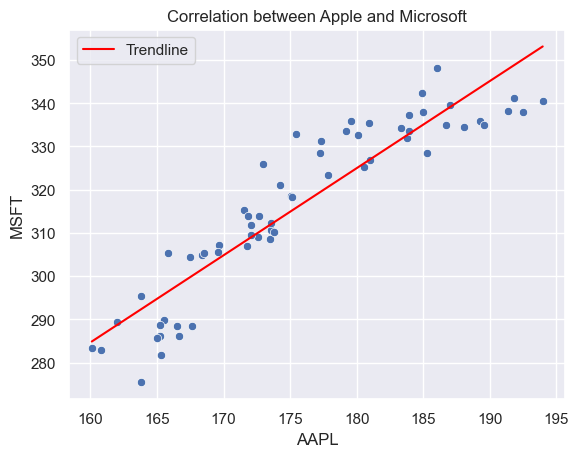

In [15]:
sns.scatterplot(data=df_corr, x='AAPL', y='MSFT')

# Calculate the linear regression parameters
slope, intercept = np.polyfit(df_corr['AAPL'], df_corr['MSFT'], deg=1)

# Plot the trendline
sns.lineplot(x=df_corr['AAPL'], y=slope * df_corr['AAPL'] + intercept, color='red', label='Trendline')

# Set the title and labels
plt.title('Correlation between Apple and Microsoft')
plt.xlabel('AAPL')
plt.ylabel('MSFT')

# Add a legend
plt.legend()

# Display the plot
plt.show()
